In [2]:
import pandas as pd
import numpy as np
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import datetime
import calendar

import seaborn as sns

from scipy.sparse import csr_matrix, lil_matrix
from scipy import spatial
from scipy import stats

%matplotlib inline

In [2]:
#####################################
####### IMPORT AND CLEAN DATA #######
#####################################

In [3]:
#Load in dataset
df = pd.read_excel(io="/Users/coreylucero/Desktop/Syracuse/IST718/Final Project/Online Retail.xlsx", sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [149]:
#Check for NA values - more than 135,000 transactions don't have a customer associated with it
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
#Drop transactions not associated with a CustomerID
dfclean = df.dropna(axis = 0, subset = ['CustomerID'])
dfclean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#####################################
####### EXPLORATORY ANALYSIS ########
#####################################

In [152]:
#Before NAs removed
print('Invoices:', len(df['InvoiceNo'].value_counts()))
print('Products:', len(df['StockCode'].value_counts()))
print('Customers:', len(df['CustomerID'].value_counts()))

Invoices: 25900
Products: 4070
Customers: 4372


In [153]:
#After NAs removed
print('Invoices:', len(dfclean['InvoiceNo'].value_counts()))
print('Products:', len(dfclean['StockCode'].value_counts()))
print('Customers:', len(dfclean['CustomerID'].value_counts()))

Invoices: 22190
Products: 3684
Customers: 4372


In [241]:
#Extract month, year, day of week and hour of day as new columns
dfclean['Month'] = dfclean['InvoiceDate'].dt.month
dfclean['Year'] = dfclean['InvoiceDate'].dt.year
dfclean['DayofWeek'] = dfclean['InvoiceDate'].dt.day_name()
dfclean['HourofDay'] = dfclean['InvoiceDate'].dt.hour
dfclean.head()

/Users/coreylucero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/coreylucero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/coreylucero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,DayofWeek,HourofDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,12,2010,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,12,2010,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,12,2010,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,12,2010,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,12,2010,Wednesday,8


In [243]:
#Create revenue column for each transaction
dfclean = data
dfclean['Revenue'] = dfclean['Quantity'] * dfclean['UnitPrice']

In [558]:
# Count of Countries
len(df.Country.value_counts())

38

In [232]:
#Calculate total revenue per country and display top 10
pd.options.display.float_format = '{:.2f}'.format
Countries = df.groupby(['Country']) # Create variable
RevPerC = Countries['Revenue'].sum() # Descriptive statistics summary by conference
RevPerC = RevPerC.to_frame()
RevPerC = RevPerC.sort_values(by=['Revenue'], ascending=False)
RevPerC=RevPerC.rename(columns = {'Revenue':'Total Revenue'})
RevPerC.head(10)

,Total Revenue
Country,
United Kingdom,6767873.39
Netherlands,284661.54
EIRE,250285.22
Germany,221698.21
France,196712.84
Australia,137077.27
Switzerland,55739.40
Spain,54774.58
Belgium,40910.96


In [235]:
#Total sales revenue in dataset
df.Revenue.sum()

8300065.8140000012

In [233]:
#Calculate average cost per product transaction per country
pd.options.display.float_format = '{:.2f}'.format
MRevPerC = Countries['Revenue'].mean() # Descriptive statistics summary by conference
MRevPerC = MRevPerC.to_frame()
MRevPerC = MRevPerC.sort_values(by=['Revenue'], ascending=False)
MRevPerC=MRevPerC.rename(columns = {'Revenue':'Average Revenue'})
MRevPerC.head(10)

,Average Revenue
Country,
Netherlands,120.06
Australia,108.88
Japan,98.72
Sweden,79.21
Denmark,48.25
Lithuania,47.46
Singapore,39.83
Lebanon,37.64
Brazil,35.74


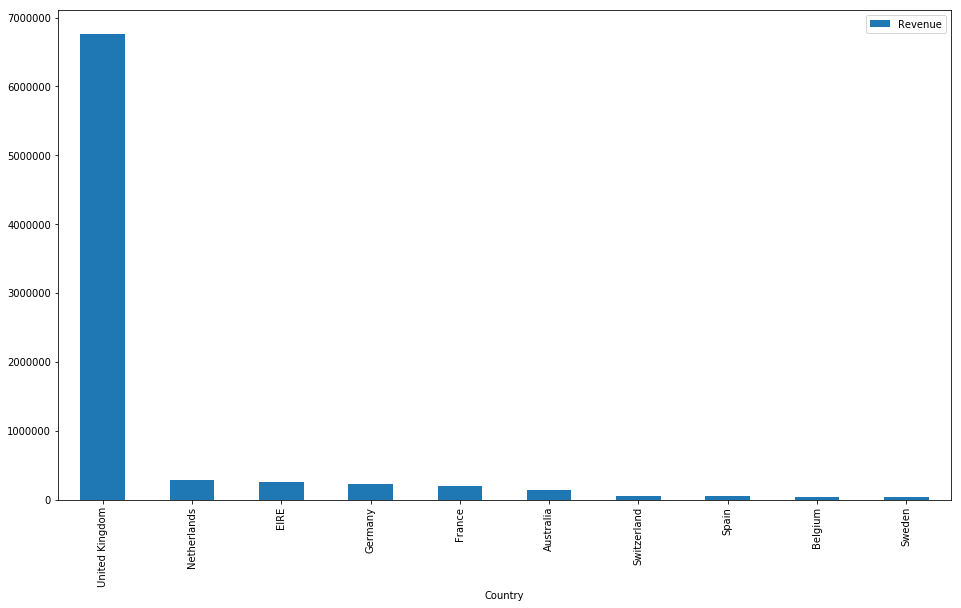

In [230]:
#Plot total revenue per country
RevPerC.head(10).plot.bar()

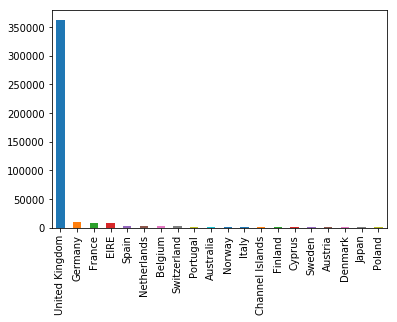

In [158]:
#Boxplot of count of country
df.Country.value_counts()[0:20].plot.bar()

In [234]:
#Observations per country
df.Country.value_counts()[0:20]

United Kingdom     361878
Germany              9495
France               8491
EIRE                 7485
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1480
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Austria               401
Denmark               389
Japan                 358
Poland                341
Name: Country, dtype: int64

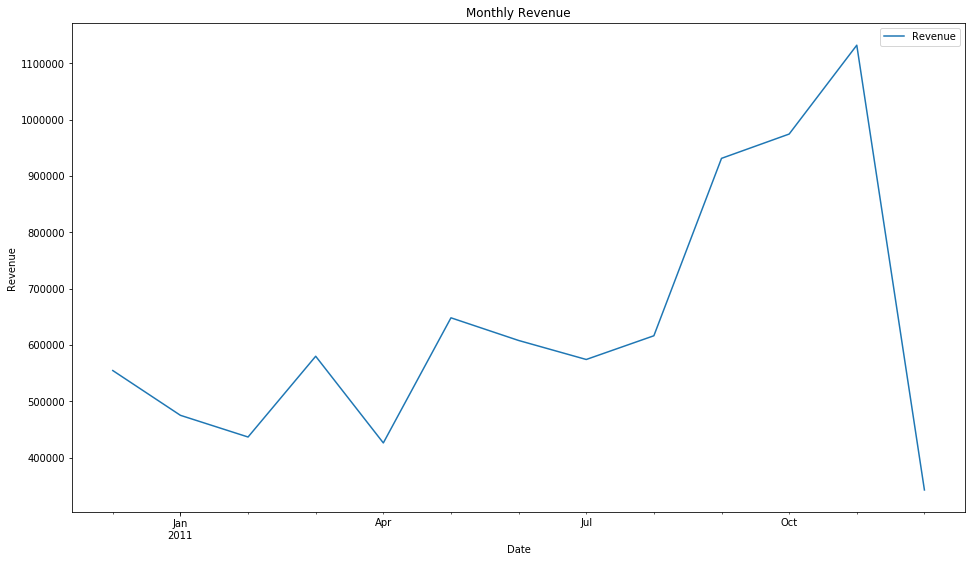

In [168]:
#Create dataframe of monthly sales and plot
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = [16,9]
sales = df[['Year', 'Month', 'Revenue']].groupby(['Year', 'Month']).sum().reset_index()
sales['Day'] = 1
sales['Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']])
sales = sales.set_index('Date')
sales = sales.drop(['Year', 'Month', 'Day'], axis=1)
sales.plot()
plt.title('Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


In [195]:
WeekRev = df[['Revenue','DayofWeek']]
grouped_Week = WeekRev.groupby(['DayofWeek'])
grouped_Week = grouped_Week['Revenue'].mean().reset_index()
grouped_Week

,DayofWeek,Revenue
0,0,19.200258
1,1,22.951014
2,2,21.678458
3,3,23.139682
4,4,22.116204
5,6,12.404429


In [185]:
df['DayofWeek'].value_counts()

3    82374
2    70599
1    68110
0    66382
6    63237
4    56127
Name: DayofWeek, dtype: int64

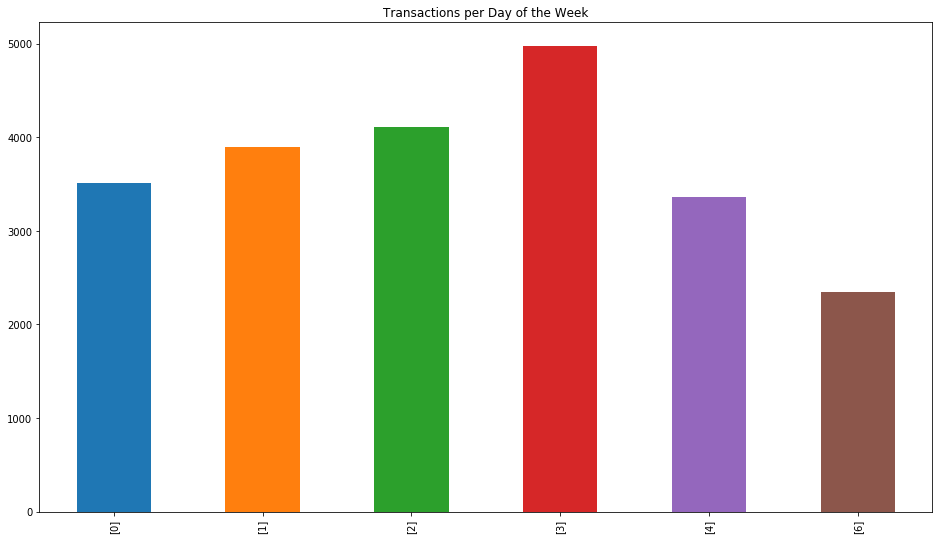

In [192]:
plt.title("Transactions per Day of the Week")
InvPerWeek = df.groupby(['InvoiceNo'])['DayofWeek'].unique()
InvPerWeek.value_counts().sort_index().plot.bar()

In [93]:
#Dataset ends on December 9th, hence the drop in revenue
df['InvoiceDate'].max()

datetime.date(2011, 12, 9)

In [93]:
gain_filter = df.TotalPrice > 0 
cost_filter = df.TotalPrice < 0
df_Costs=df[cost_filter]
df_Gains =df[gain_filter]
TotalCosts=df_Costs['TotalPrice'].sum()
TotalGains=df_Gains['TotalPrice'].sum()

In [182]:
#df.groupby('Description').TotalPrice.agg('mean').sort_values(ascending=False)
#df.Description.value_counts()
df.groupby(['Description','Country']).UnitPrice.mean().sort_values(ascending=False)

Description                          Country        
AMAZON FEE                           United Kingdom     7324.784706
Manual                               Hong Kong          1854.603333
                                     Singapore          1736.985714
                                     France             1478.497000
                                     EIRE               1268.870833
                                     Spain               947.540000
PICNIC BASKET WICKER 60 PIECES       United Kingdom      649.500000
Manual                               Portugal            604.223571
POSTAGE                              Canada              550.940000
CRUK Commission                      United Kingdom      495.839375
Discount                             EIRE                434.510000
Manual                               Cyprus              320.690000
POSTAGE                              Australia           306.365000
Manual                               Channel Islands     293.00

In [ ]:
#####################################
######## Product Categories #########
#####################################

In [6]:
# import packages for text processing and multivariate analysis
import re  # regular expressions
import nltk  # draw on the Python natural language toolkit
import scipy

# terms-by-documents matrix
from sklearn.feature_extraction.text import CountVectorizer

# alternative distance metrics for multidimensional scaling
from sklearn.metrics import euclidean_distances 
from sklearn.metrics.pairwise import linear_kernel as cosine_distances
from sklearn.metrics.pairwise import manhattan_distances as manhattan_distances

from sklearn import manifold  # multidimensional scaling
from sklearn.cluster import KMeans  # cluster analysis by partitioning
from sklearn.decomposition import PCA  # principal component analysis

In [7]:
#Drop Dexcriptions with NA
textdf = dfclean.dropna(axis = 0, subset = ['Description'])

In [8]:
#Isolate just product ID and the description
textdf = textdf[['StockCode','Description']]
len(textdf)

406829

In [9]:
#Drop duplicate descriptions
textdf = textdf.drop_duplicates(subset='Description')
len(textdf)

3896

In [10]:
import string

#Remove numbers, convert to string, lowercase and remove punctuation
textdf['dclean'] = textdf['Description'].str.replace('\d+', '')
textdf['dclean'] = textdf['dclean'].astype(str)
textdf['dclean'] = textdf['dclean'].apply(lambda x: " ".join(x.lower() for x in x.split()))
textdf['dclean'] = textdf['dclean'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
textdf.head()

,StockCode,Description,dclean
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,white hanging heart tlight holder
1,71053,WHITE METAL LANTERN,white metal lantern
2,84406B,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,red woolly hottie white heart


In [11]:
#Remove stopwords, including custom stopwords list
from nltk.corpus import stopwords

more_stop_words = ['cant','white','red', 'yellow','yellowblue','yelloworange','youre','yellowpink','blue','pink','design'] 
stoplist = stopwords.words('english') + more_stop_words

textdf['dclean'] = textdf['dclean'].apply(lambda x: " ".join(x for x in x.split() if x not in stoplist))
textdf.head()

,StockCode,Description,dclean
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,hanging heart tlight holder
1,71053,WHITE METAL LANTERN,metal lantern
2,84406B,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,woolly hottie heart


In [12]:
#Lemmatize - a more advanced version of stemming / getting words to their root (removing -ing, -s, etc..) 
from textblob import Word
textdf['dclean'] = textdf['dclean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
textdf.head()

,StockCode,Description,dclean
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,hanging heart tlight holder
1,71053,WHITE METAL LANTERN,metal lantern
2,84406B,CREAM CUPID HEARTS COAT HANGER,cream cupid heart coat hanger
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,woolly hottie heart


In [13]:
#Convert dclean column into a tdm
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(textdf['dclean'])
bowdf = pd.DataFrame(train_bow.toarray(), columns=bow.get_feature_names())
print(bowdf)

      abc  abstract  acapulco  account  acrylic  address  ade  adult  advent  \
0       0         0         0        0        0        0    0      0       0   
1       0         0         0        0        0        0    0      0       0   
2       0         0         0        0        0        0    0      0       0   
3       0         0         0        0        0        0    0      0       0   
4       0         0         0        0        0        0    0      0       0   
5       0         0         0        0        0        0    0      0       0   
6       0         0         0        0        0        0    0      0       0   
7       0         0         0        0        0        0    0      0       0   
8       0         0         0        0        0        0    0      0       0   
9       0         0         0        0        0        0    0      0       0   
10      0         0         0        0        0        0    0      0       0   
11      0         0         0        0  

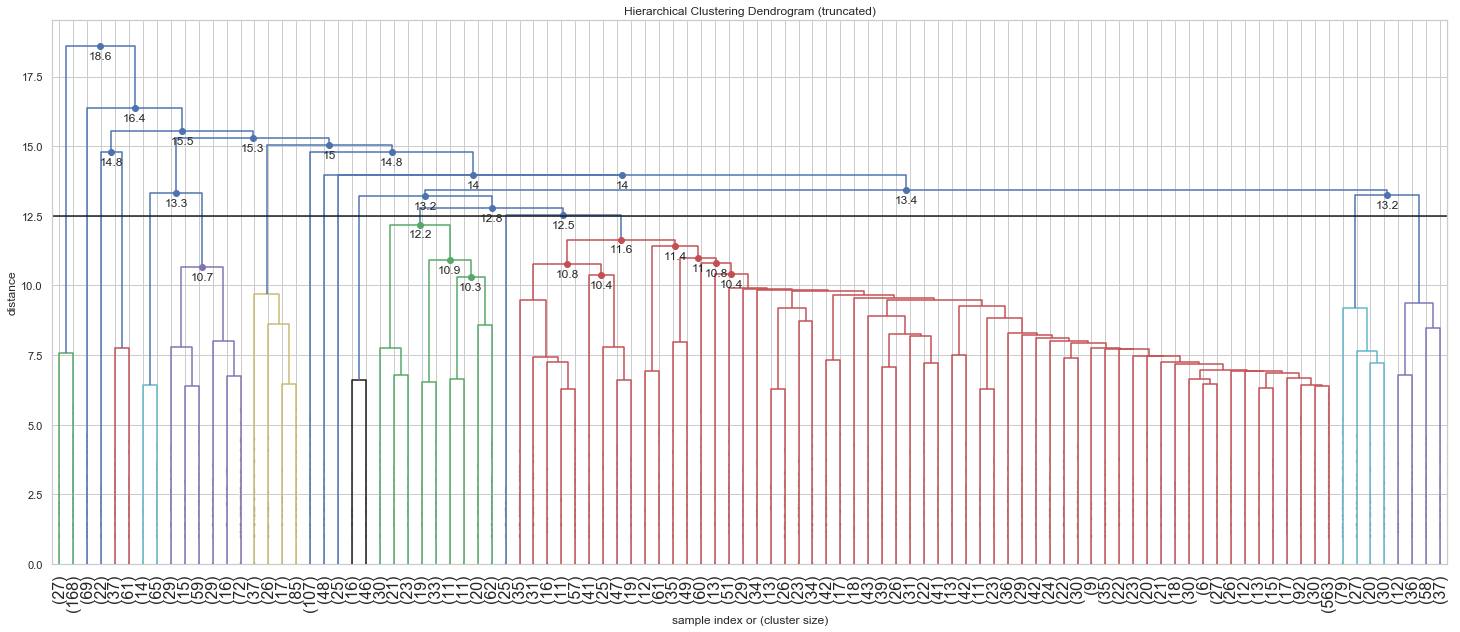

In [450]:
#Perform hiearcarchical clustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage

linkage_matrix = linkage(bowdf, 'ward') #define the linkage_matrix using ward clustering pre-computed distances

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=100,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=16.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    annotate_above=10,
    max_d=12.5,
)
plt.show()

In [451]:
#Create final array of cluster numbers from hierarchy
from scipy.cluster.hierarchy import fcluster
max_d = 12.5
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
clusters



array([ 2,  4, 14, ...,  7,  2, 14], dtype=int32)

In [452]:
#Apply hierarchical clustering results to stock code
textdf['cluster'] = Series(clusters, index=textdf.index)
textdf.head()

,StockCode,Description,dclean,cluster
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,hanging heart tlight holder,2
1,71053,WHITE METAL LANTERN,metal lantern,4
2,84406B,CREAM CUPID HEARTS COAT HANGER,cream cupid heart coat hanger,14
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle,13
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,woolly hottie heart,6


In [453]:
#Subset each product category
ClusterA = textdf[textdf["cluster"] == 1]
ClusterB = textdf[textdf["cluster"] == 2]
ClusterC = textdf[textdf["cluster"] == 3]
ClusterD = textdf[textdf["cluster"] == 4]
ClusterE = textdf[textdf["cluster"] == 5]
ClusterF = textdf[textdf["cluster"] == 6]
ClusterG = textdf[textdf["cluster"] == 7]
ClusterH = textdf[textdf["cluster"] == 8]
ClusterI = textdf[textdf["cluster"] == 9]
ClusterJ = textdf[textdf["cluster"] == 10]
ClusterK = textdf[textdf["cluster"] == 11]
ClusterL = textdf[textdf["cluster"] == 12]
ClusterM = textdf[textdf["cluster"] == 13]
ClusterN = textdf[textdf["cluster"] == 14]
ClusterO = textdf[textdf["cluster"] == 15]
ClusterP = textdf[textdf["cluster"] == 16]


In [454]:
ClusterA.head(20)


,StockCode,Description,dclean,cluster
44,22492,MINI PAINT SET VINTAGE,mini paint set vintage,1
90,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,piece retrospot cutlery set,1
91,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET,piece polkadot cutlery set,1
92,21094,SET/6 RED SPOTTY PAPER PLATES,set spotty paper plate,1
100,84519A,TOMATO CHARLIE+LOLA COASTER SET,tomato charlielola coaster set,1
106,22139,RETROSPOT TEA SET CERAMIC 11 PC,retrospot tea set ceramic pc,1
107,84854,GIRLY PINK TOOL SET,girly tool set,1
131,21557,SET OF 6 FUNKY BEAKERS,set funky beaker,1
154,35004C,SET OF 3 COLOURED FLYING DUCKS,set coloured flying duck,1
201,35004G,SET OF 3 GOLD FLYING DUCKS,set gold flying duck,1


In [455]:
from wordcloud import WordCloud

def CreateCloud(data):
    wordcloud2 = WordCloud(background_color='white', scale = 3, collocations=False).generate(' '.join(data))
    
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud2)
    plt.show()

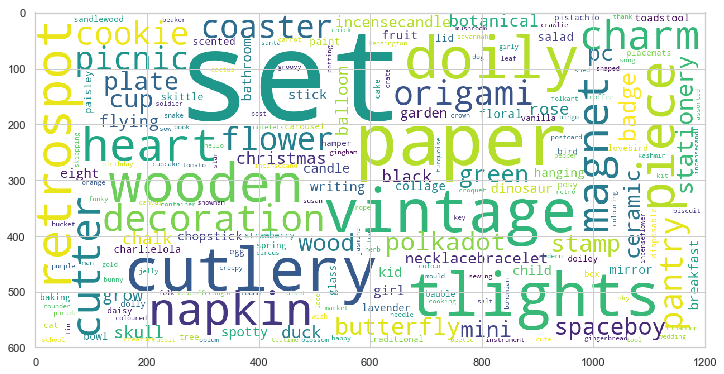

In [456]:
CreateCloud(ClusterA['dclean'])

In [457]:
ClusterA.dclean.str.split(expand=True).stack().value_counts()[:20]

set           187
paper          25
vintage        17
tlights        17
cutlery        17
doily          16
wooden         13
piece          11
retrospot      11
napkin          9
heart           9
magnet          8
charm           7
decoration      7
origami         7
cutter          7
flower          6
pantry          6
picnic          6
cookie          6
dtype: int64

In [458]:
ClusterB.head(20)

,StockCode,Description,dclean,cluster
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,hanging heart tlight holder,2
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER,glass star frosted tlight holder,2
83,21733,RED HANGING HEART T-LIGHT HOLDER,hanging heart tlight holder,2
156,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,colour glass tlight holder hanging,2
217,84970S,HANGING HEART ZINC T-LIGHT HOLDER,hanging heart zinc tlight holder,2
449,22178,VICTORIAN GLASS HANGING T-LIGHT,victorian glass hanging tlight,2
450,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,single heart zinc tlight holder,2
453,84949,SILVER HANGING T-LIGHT HOLDER,silver hanging tlight holder,2
476,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,rotating silver angel tlight hldr,2
491,85116,BLACK CANDELABRA T-LIGHT HOLDER,black candelabra tlight holder,2


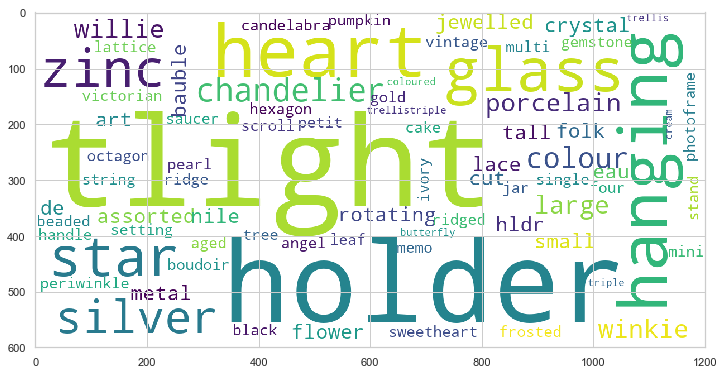

In [459]:
CreateCloud(ClusterB['dclean'])

In [460]:
ClusterB.dclean.str.split(expand=True).stack().value_counts()[:20]

tlight        67
holder        64
heart         19
hanging       16
glass         13
star          11
zinc          10
silver         8
chandelier     5
colour         4
willie         3
porcelain      3
large          3
winkie         3
small          2
hldr           2
jewelled       2
metal          2
rotating       2
tall           2
dtype: int64

In [461]:
ClusterC.head(100)

,StockCode,Description,dclean,cluster
140,21523,DOORMAT FANCY FONT HOME SWEET HOME,doormat fancy font home sweet home,3
1352,21524,DOORMAT SPOTTY HOME SWEET HOME,doormat spotty home sweet home,3
2122,22400,MAGNETS PACK OF 4 HOME SWEET HOME,magnet pack home sweet home,3
3063,21877,HOME SWEET HOME MUG,home sweet home mug,3
6571,21164,HOME SWEET HOME METAL SIGN,home sweet home metal sign,3
9974,22690,DOORMAT HOME SWEET HOME BLUE,doormat home sweet home,3
24243,22391,PAPERWEIGHT HOME SWEET HOME,paperweight home sweet home,3
324814,23407,SET OF 2 TRAYS HOME SWEET HOME,set tray home sweet home,3
324815,23393,HOME SWEET HOME CUSHION COVER,home sweet home cushion cover,3
324816,23427,STOOL HOME SWEET HOME,stool home sweet home,3


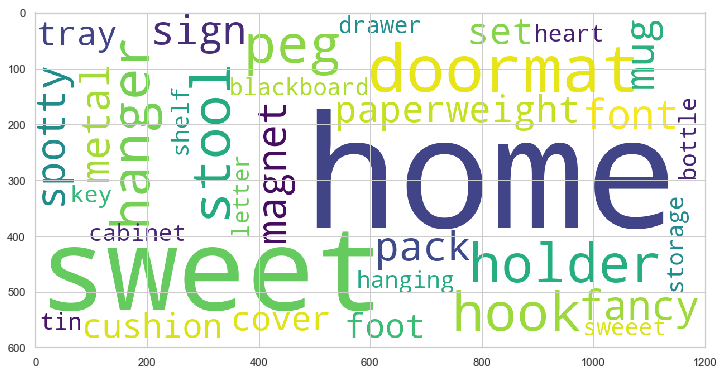

In [462]:
CreateCloud(ClusterC['dclean'])

In [463]:
ClusterC.dclean.str.split(expand=True).stack().value_counts()[:20]

home           44
sweet          21
doormat         3
stool           2
holder          2
hook            2
hanger          2
peg             2
paperweight     1
storage         1
cushion         1
set             1
blackboard      1
pack            1
shelf           1
cabinet         1
sign            1
letter          1
bottle          1
magnet          1
dtype: int64

In [464]:
ClusterD.head(20)

,StockCode,Description,dclean,cluster
1,71053,WHITE METAL LANTERN,metal lantern,4
109,82567,"AIRLINE LOUNGE,METAL SIGN",airline loungemetal sign,4
117,21169,YOU'RE CONFUSING ME METAL SIGN,confusing metal sign,4
118,21166,COOK WITH WINE METAL SIGN,cook wine metal sign,4
119,21175,GIN + TONIC DIET METAL SIGN,gin tonic diet metal sign,4
157,22464,HANGING METAL HEART LANTERN,hanging metal heart lantern,4
261,85152,HAND OVER THE CHOCOLATE SIGN,hand chocolate sign,4
337,85150,LADIES & GENTLEMEN METAL SIGN,lady gentleman metal sign,4
338,22117,METAL SIGN HER DINNER IS SERVED,metal sign dinner served,4
341,82580,BATHROOM METAL SIGN,bathroom metal sign,4


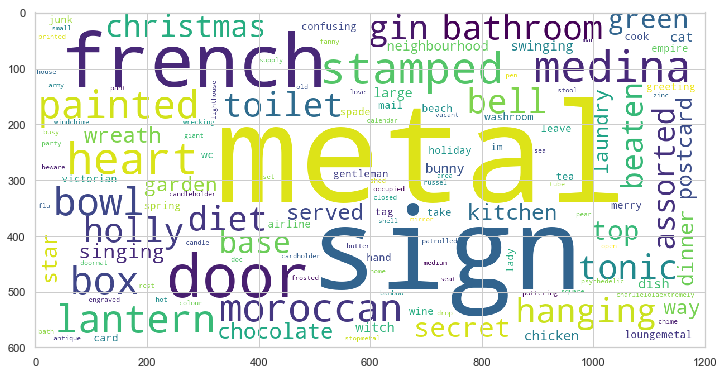

In [465]:
CreateCloud(ClusterD['dclean'])

In [466]:
ClusterD.dclean.str.split(expand=True).stack().value_counts()[:20]

metal        88
sign         59
french       17
door         11
medina        5
stamped       5
heart         5
painted       4
lantern       4
box           4
moroccan      4
bowl          4
base          3
toilet        3
christmas     3
hanging       3
bathroom      3
bell          3
top           3
beaten        3
dtype: int64

In [467]:
ClusterE.head(20)

,StockCode,Description,dclean,cluster
172,85049A,TRADITIONAL CHRISTMAS RIBBONS,traditional christmas ribbon,5
516,22075,6 RIBBONS ELEGANT CHRISTMAS,ribbon elegant christmas,5
557,22940,FELTCRAFT CHRISTMAS FAIRY,feltcraft christmas fairy,5
574,22141,CHRISTMAS CRAFT TREE TOP ANGEL,christmas craft tree top angel,5
623,22952,60 CAKE CASES VINTAGE CHRISTMAS,cake case vintage christmas,5
628,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,set vintage christmas napkin,5
629,35591T,TURQUOISE CHRISTMAS TREE,turquoise christmas tree,5
644,22594,CHRISTMAS GINGHAM TREE,christmas gingham tree,5
735,22142,CHRISTMAS CRAFT WHITE FAIRY,christmas craft fairy,5
814,21816,CHRISTMAS TREE T-LIGHT HOLDER,christmas tree tlight holder,5


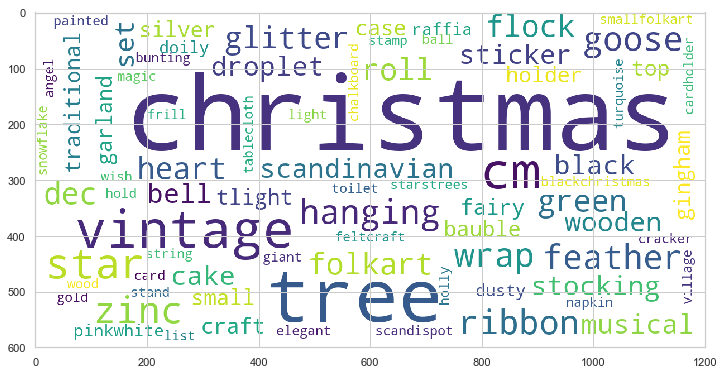

In [468]:
CreateCloud(ClusterE['dclean'])

In [469]:
ClusterE.dclean.str.split(expand=True).stack().value_counts()[:20]

christmas    75
tree         33
vintage      13
cm           12
star          8
zinc          6
ribbon        5
wrap          5
goose         5
hanging       5
feather       5
flock         4
glitter       4
green         4
roll          4
dec           4
heart         4
folkart       4
sticker       3
wooden        3
dtype: int64

In [470]:
ClusterF.head(20)

,StockCode,Description,dclean,cluster
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,woolly hottie heart,6
36,22659,LUNCH BOX I LOVE LONDON,lunch box love london,6
158,21324,HANGING MEDINA LANTERN SMALL,hanging medina lantern small,6
160,22469,HEART OF WICKER SMALL,heart wicker small,6
161,22470,HEART OF WICKER LARGE,heart wicker large,6
187,21411,GINGHAM HEART DOORSTOP RED,gingham heart doorstop,6
188,22318,FIVE HEART HANGING DECORATION,five heart hanging decoration,6
219,20668,DISCO BALL CHRISTMAS DECORATION,disco ball christmas decoration,6
251,22338,STAR DECORATION PAINTED ZINC,star decoration painted zinc,6
294,22803,IVORY EMBROIDERED QUILT,ivory embroidered quilt,6


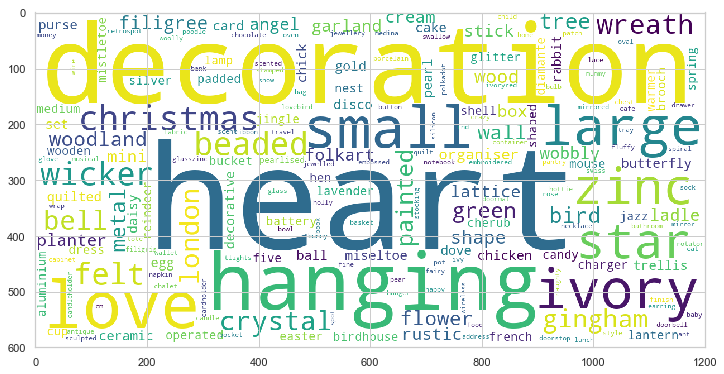

In [471]:
CreateCloud(ClusterF['dclean'])

In [472]:
ClusterF.dclean.str.split(expand=True).stack().value_counts()[:20]

heart         132
decoration     74
hanging        44
love           29
small          21
ivory          20
large          19
zinc           17
star           16
christmas      15
beaded         13
wicker         13
felt           12
bell           10
wreath         10
crystal        10
london         10
gingham         9
painted         8
bird            7
dtype: int64

In [473]:
ClusterG.head(20)

,StockCode,Description,dclean,cluster
35,22629,SPACEBOY LUNCH BOX,spaceboy lunch box,7
86,22386,JUMBO BAG PINK POLKADOT,jumbo bag polkadot,7
87,85099C,JUMBO BAG BAROQUE BLACK WHITE,jumbo bag baroque black,7
88,21033,JUMBO BAG CHARLIE AND LOLA TOYS,jumbo bag charlie lola toy,7
89,20723,STRAWBERRY CHARLOTTE BAG,strawberry charlotte bag,7
103,21931,JUMBO STORAGE BAG SUKI,jumbo storage bag suki,7
104,21929,JUMBO BAG PINK VINTAGE PAISLEY,jumbo bag vintage paisley,7
108,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,jumbo shopper vintage paisley,7
116,21934,SKULL SHOULDER BAG,skull shoulder bag,7
177,85099B,JUMBO BAG RED RETROSPOT,jumbo bag retrospot,7


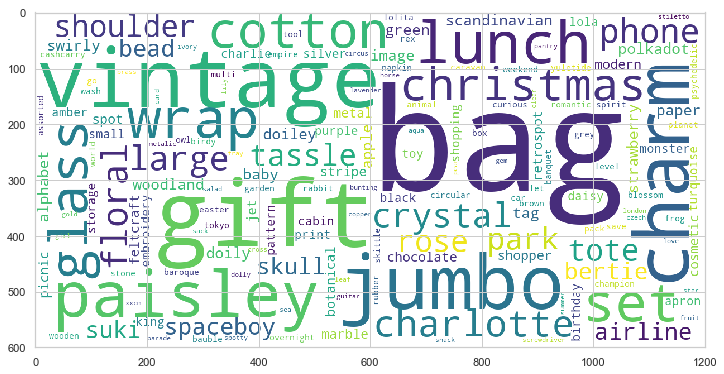

In [474]:
CreateCloud(ClusterG['dclean'])

In [475]:
ClusterG.dclean.str.split(expand=True).stack().value_counts()[:20]

bag          121
gift          37
vintage       31
jumbo         26
charm         26
paisley       19
lunch         16
wrap          14
glass         13
set           13
cotton        11
christmas     11
charlotte      9
floral         8
large          7
phone          7
crystal        7
park           6
tassle         6
shoulder       6
dtype: int64

In [476]:
ClusterH.head(20)

,StockCode,Description,dclean,cluster
5,22752,SET 7 BABUSHKA NESTING BOXES,set babushka nesting box,8
15,22623,BOX OF VINTAGE JIGSAW BLOCKS,box vintage jigsaw block,8
16,22622,BOX OF VINTAGE ALPHABET BLOCKS,box vintage alphabet block,8
19,21777,RECIPE BOX WITH METAL HEART,recipe box metal heart,8
34,22326,ROUND SNACK BOXES SET OF4 WOODLAND,round snack box set woodland,8
65,21258,VICTORIAN SEWING BOX LARGE,victorian sewing box large,8
94,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,strawberry lunch box cutlery,8
95,22352,LUNCH BOX WITH CUTLERY RETROSPOT,lunch box cutlery retrospot,8
319,22098,BOUDOIR SQUARE TISSUE BOX,boudoir square tissue box,8
320,22100,SKULLS SQUARE TISSUE BOX,skull square tissue box,8


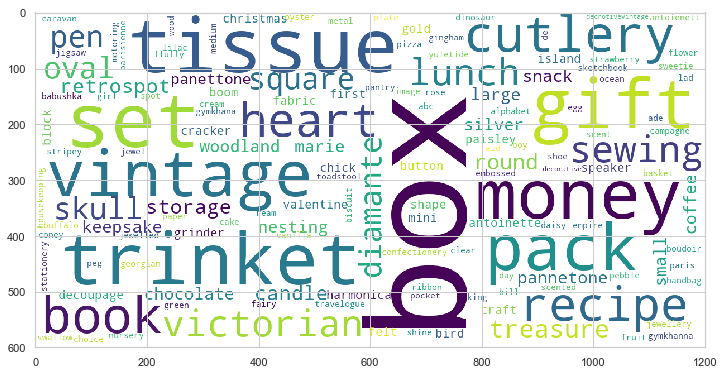

In [477]:
CreateCloud(ClusterH['dclean'])

In [478]:
ClusterH.dclean.str.split(expand=True).stack().value_counts()[:20]

box          106
set           11
tissue        11
trinket       10
money          9
gift           9
vintage        8
pack           8
cutlery        6
book           6
victorian      5
pen            5
treasure       5
oval           5
sewing         5
square         5
lunch          5
recipe         5
heart          5
skull          5
dtype: int64

In [479]:
ClusterI.head(20)

,StockCode,Description,dclean,cluster
898,21370,MIRRORED WALL ART FOXY,mirrored wall art foxy,9
899,21367,MIRRORED WALL ART GENTS,mirrored wall art gent,9
2351,21374,MIRRORED WALL ART SKULLS,mirrored wall art skull,9
2352,21365,MIRRORED WALL ART STARS,mirrored wall art star,9
11885,21366,MIRRORED WALL ART PHOTO FRAMES,mirrored wall art photo frame,9
37697,21372,MIRRORED WALL ART TABLE LAMP,mirrored wall art table lamp,9
58404,21368,MIRRORED WALL ART LADIES,mirrored wall art lady,9
65949,21371,MIRRORED WALL ART POPPIES,mirrored wall art poppy,9
106624,21293,MIRRORED DOVE WALL DECORATION,mirrored dove wall decoration,9
111988,21369,MIRRORED WALL ART SPLODGES,mirrored wall art splodge,9


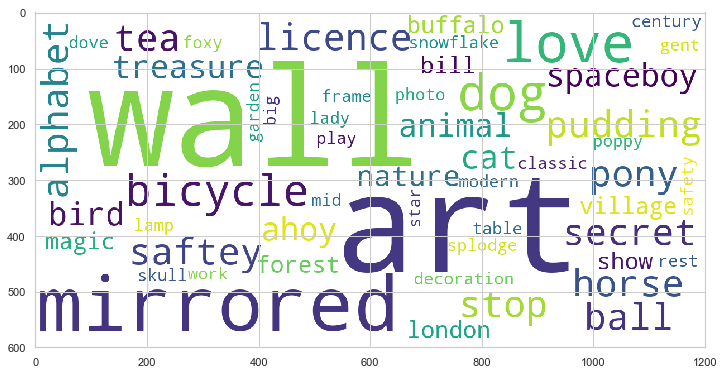

In [480]:
CreateCloud(ClusterI['dclean'])

In [481]:
ClusterI.dclean.str.split(expand=True).stack().value_counts()[:20]

wall        48
art         47
mirrored    11
love         5
dog          4
bicycle      3
cat          2
ahoy         2
licence      2
london       2
alphabet     2
saftey       2
spaceboy     2
nature       2
magic        2
animal       2
secret       2
buffalo      2
pony         2
forest       2
dtype: int64

In [482]:
ClusterP.head()

,StockCode,Description,dclean,cluster
21,22960,JAM MAKING SET WITH JARS,jam making set jar,16
105,22961,JAM MAKING SET PRINTED,jam making set printed,16
138,22778,GLASS CLOCHE SMALL,glass cloche small,16
148,22798,ANTIQUE GLASS DRESSING TABLE POT,antique glass dressing table pot,16
214,22962,JAM JAR WITH PINK LID,jam jar lid,16


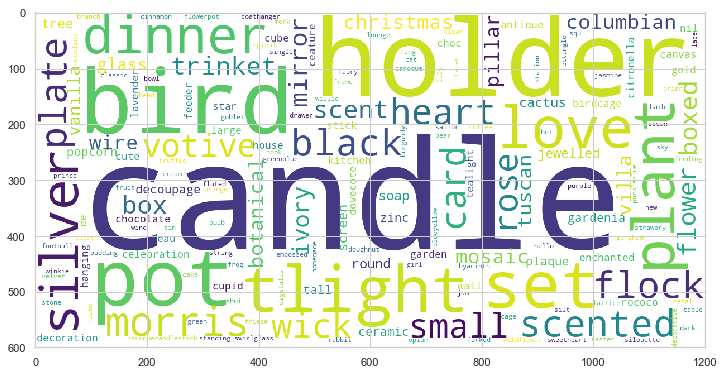

In [483]:
CreateCloud(ClusterO['dclean'])

In [484]:
ClusterP.dclean.str.split(expand=True).stack().value_counts()[:20]

glass       92
bracelet    43
jar         35
large       13
jam         13
bead        12
small       12
boudicca    12
black       11
silver       9
green        9
tlight       8
ant          8
etched       8
antique      7
fire         6
polished     6
chunky       6
hoop         6
vintage      6
dtype: int64

In [485]:
#How many StockCodes in each cluster?
countcluster = textdf.drop_duplicates().groupby('cluster').count()
print(countcluster)

         StockCode  Description  dclean
cluster                                
1              195          195     195
2               69           69      69
3               22           22      22
4               98           98      98
5               79           79      79
6              220          220     220
7              165          165     165
8              107          107     107
9               48           48      48
10              25           25      25
11              62           62      62
12             230          230     230
13              25           25      25
14            2252         2252    2252
15             156          156     156
16             143          143     143


In [486]:
#####################################
######## CUSTOMER CATEGORIES ########
#####################################

In [487]:
#Append cluster(product category) to main dataframe

colsToDrop = ['Description','dclean'] #Define the columns you want to delete
textdict = textdf.drop(colsToDrop, axis=1) #Drop the defined columns

textdict.head()

,StockCode,cluster
0,85123A,2
1,71053,4
2,84406B,14
3,84029G,13
4,84029E,6


In [488]:
#Append cluster(product category) to main dataframe

result = pd.merge(dfclean, textdict, on='StockCode', how='left') #Combine dataframes

#Rename columns 
result.columns = ['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country','ProductCategory']

result.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ProductCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.0
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.0
3,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.0
4,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,14.0


In [489]:
#Create Revenue Column
result['Revenue'] = result['Quantity']*result['UnitPrice']
result.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ProductCategory,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.0,15.30
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.0,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.0,20.34
3,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.0,20.34
4,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,14.0,22.00


In [493]:
#Extract month, year, day of week and hour of day as new columns
result['Month'] = result['InvoiceDate'].dt.month
result['Year'] = result['InvoiceDate'].dt.year
result['DayofWeek'] = result['InvoiceDate'].dt.day_name()
result['HourofDay'] = result['InvoiceDate'].dt.hour

In [494]:
#Subset each product category
ResultA = result[result["ProductCategory"] == 1]
ResultB = result[result["ProductCategory"] == 2]
ResultC = result[result["ProductCategory"] == 3]
ResultD = result[result["ProductCategory"] == 4]
ResultE = result[result["ProductCategory"] == 5]
ResultF = result[result["ProductCategory"] == 6]
ResultG = result[result["ProductCategory"] == 7]
ResultH = result[result["ProductCategory"] == 8]
ResultI = result[result["ProductCategory"] == 9]
ResultJ = result[result["ProductCategory"] == 10]
ResultK = result[result["ProductCategory"] == 11]
ResultL = result[result["ProductCategory"] == 12]
ResultM = result[result["ProductCategory"] == 13]
ResultN = result[result["ProductCategory"] == 14]
ResultO = result[result["ProductCategory"] == 15]
ResultP = result[result["ProductCategory"] == 16]

In [495]:
#Clean data to create a time series plot
from matplotlib.pyplot import figure

#Create function to sum revenue by month
def CreateTS(df,name):
    sales = df[['Year', 'Month', 'Revenue']].groupby(['Year', 'Month']).sum().reset_index()
    sales['Day'] = 1
    sales['Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']])
    sales = sales.set_index('Date')
    sales = sales.drop(['Year', 'Month', 'Day'], axis=1)
    sales.columns = [name]
    return(sales)

A = CreateTS(ResultA, 'Category A')
B = CreateTS(ResultB, 'Category B')
C = CreateTS(ResultC, 'Category C')
D = CreateTS(ResultD, 'Category D')
E = CreateTS(ResultE, 'Category E')
F = CreateTS(ResultF, 'Category F')
G = CreateTS(ResultG, 'Category G')
H = CreateTS(ResultH, 'Category H')
I = CreateTS(ResultI, 'Category I')
J = CreateTS(ResultJ, 'Category J')
K = CreateTS(ResultK, 'Category K')
L = CreateTS(ResultL, 'Category L')
M = CreateTS(ResultM, 'Category M')
N = CreateTS(ResultN, 'Category N')
O = CreateTS(ResultO, 'Category O')
P = CreateTS(ResultP, 'Category P')

#Merge all dataframes into one
AB = A.join(B, how='outer') 
ABC = AB.join(C, how='outer') 
ABCD = ABC.join(D, how='outer') 
ABCDE = ABCD.join(E, how='outer') 
ABCDEF = ABCDE.join(F, how='outer') 
ABCDEFG = ABCDEF.join(G, how='outer') 
ABCDEFGH = ABCDEFG.join(H, how='outer') 
ABCDEFGHI = ABCDEFGH.join(I, how='outer') 
ABCDEFGHIJ = ABCDEFGHI.join(J, how='outer') 
ABCDEFGHIJK = ABCDEFGHIJ.join(K, how='outer') 
ABCDEFGHIJKL = ABCDEFGHIJK.join(L, how='outer') 
ABCDEFGHIJKLM = ABCDEFGHIJKL.join(M, how='outer') 
ABCDEFGHIJKLMN = ABCDEFGHIJKLM.join(N, how='outer') 
ABCDEFGHIJKLMNO = ABCDEFGHIJKLMN.join(O, how='outer') 
ABCDEFGHIJKLMNOP = ABCDEFGHIJKLMNO.join(P, how='outer') 

ABCDEFGHIJKLMNOP.head()

,Category A,Category B,Category C,Category D,Category E,Category F,Category G,Category H,Category I,Category J,Category K,Category L,Category M,Category N,Category O,Category P
Date,,,,,,,,,,,,,,,,
2010-12-01,28250.04,35560.32,2903.90,16094.51,7030.31,29674.10,33084.42,30007.56,66.20,25.00,977.590,46299.90,35520.01,293515.31,26038.64,15673.22
2011-01-01,39692.36,40843.52,2766.57,18728.04,109.81,23240.81,38622.00,17798.06,136.95,5.00,1293.550,62081.72,5705.97,254873.33,11816.42,14034.06
2011-02-01,36693.61,18239.55,2458.50,14929.76,432.21,18342.96,37523.15,13941.49,10.20,6.25,1531.550,46750.60,2186.81,249759.34,15367.98,14192.97
2011-03-01,42537.24,20434.76,3754.99,23035.80,221.45,20632.88,75167.90,20645.99,120.30,1.25,1564.040,58990.98,1094.80,324444.03,14878.41,16437.95
2011-04-01,31187.10,19691.93,2202.80,21115.73,126.74,11976.59,42431.37,13341.10,8.85,5.00,1562.801,35357.53,855.10,257800.29,11429.81,13399.54


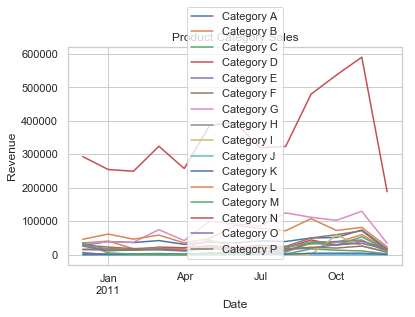

In [502]:
#Plot time series for all Product sales
ABCDEFGHIJKLMNOP.plot()
plt.title('Product Category Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [503]:
#Total Revenue Per Product Category
pd.options.display.float_format = '{:.2f}'.format
result.groupby(['ProductCategory'])['Revenue'].sum().reset_index()

,ProductCategory,Revenue
0,1.00,528108.70
1,2.00,397968.07
2,3.00,80647.83
3,4.00,316617.72
4,5.00,159251.45
5,6.00,403359.72
6,7.00,1010610.94
7,8.00,303701.20
8,9.00,96518.58
9,10.00,414.47


In [504]:
#Remove outliers
result1 = result.drop(result[(result.Revenue < -30000)].index)
result1 = result1.drop(result1[(result1.Revenue > 30000)].index)

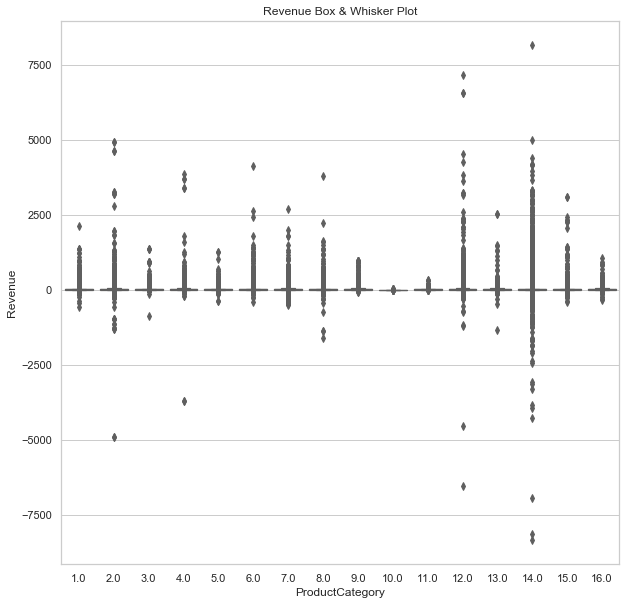

In [505]:
#Plot revenue per product category
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
plot1 = sns.boxplot(x='ProductCategory', y='Revenue', data=result1, palette = "Set3", 
                    linewidth=1.25).set_title('Revenue Box & Whisker Plot')

In [506]:
#Average unit price per product category
result.groupby(['ProductCategory'])['UnitPrice'].mean().reset_index()


,ProductCategory,UnitPrice
0,1.00,2.80
1,2.00,2.14
2,3.00,5.42
3,4.00,2.53
4,5.00,1.60
5,6.00,1.98
6,7.00,1.93
7,8.00,3.13
8,9.00,5.25
9,10.00,0.88


In [507]:
#Create revenue by InvoiceNo (total revenue per transaction)
RevenuePerCustomer = result.groupby(['CustomerID'])['Revenue'].sum().reset_index()
RevenuePerCustomer.head()

,CustomerID,Revenue
0,12346.00,0.00
1,12347.00,4452.22
2,12348.00,1860.84
3,12349.00,2042.77
4,12350.00,334.40


In [508]:
#Create revenue by category within each transaction
CategoryRevenue = result.groupby(['CustomerID','ProductCategory'])['Revenue'].sum().reset_index()


CategoryRevenue = CategoryRevenue.pivot(index='CustomerID', columns='ProductCategory',values='Revenue')


CategoryRevenue = CategoryRevenue.reset_index().rename_axis(None, axis=1)
CategoryRevenue=CategoryRevenue.fillna(0)
CategoryRevenue.head()

,CustomerID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
0,12346.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12347.00,208.50,115.80,0.00,27.60,46.80,21.78,459.70,101.70,0.00,0.00,0.00,301.05,0.00,3113.49,55.80,0.00
2,12348.00,191.00,0.00,0.00,0.00,127.20,0.00,0.00,0.00,0.00,0.00,0.00,230.40,0.00,1312.24,0.00,0.00
3,12349.00,185.80,34.80,0.00,27.04,0.00,85.05,0.00,35.40,0.00,0.00,0.00,367.71,0.00,1236.67,19.80,50.50
4,12350.00,0.00,0.00,0.00,67.80,0.00,0.00,0.00,15.00,0.00,0.00,25.20,79.80,0.00,146.60,0.00,0.00


In [509]:
#Create total revenue column, convert CustomerID to index
Customerdf = pd.merge(CategoryRevenue, RevenuePerCustomer, on='CustomerID', how='left') #Combine dataframes

Customerdf = Customerdf.set_index('CustomerID')
Customerdf.head()


,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,Revenue
CustomerID,,,,,,,,,,,,,,,,,
12346.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12347.00,208.50,115.80,0.00,27.60,46.80,21.78,459.70,101.70,0.00,0.00,0.00,301.05,0.00,3113.49,55.80,0.00,4452.22
12348.00,191.00,0.00,0.00,0.00,127.20,0.00,0.00,0.00,0.00,0.00,0.00,230.40,0.00,1312.24,0.00,0.00,1860.84
12349.00,185.80,34.80,0.00,27.04,0.00,85.05,0.00,35.40,0.00,0.00,0.00,367.71,0.00,1236.67,19.80,50.50,2042.77
12350.00,0.00,0.00,0.00,67.80,0.00,0.00,0.00,15.00,0.00,0.00,25.20,79.80,0.00,146.60,0.00,0.00,334.40


In [510]:
#Create average revenue per transaction and total transaction count per customer
Customers = result.groupby(['CustomerID']).Revenue.agg(['mean','count'])
Customers.rename(columns={'mean':'AverageTransactionRevenue','count':'TotalTransactions'}, inplace=True)
Customers.head()

,AverageTransactionRevenue,TotalTransactions
CustomerID,,
12346.00,0.00,2
12347.00,23.56,189
12348.00,56.39,33
12349.00,24.03,85
12350.00,19.67,17


In [511]:
#Combine all columns to one Customerdf
Customerdf = Customers.join(Customerdf, how='outer')
Customerdf.head()

,AverageTransactionRevenue,TotalTransactions,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,Revenue
CustomerID,,,,,,,,,,,,,,,,,,,
12346.00,0.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12347.00,23.56,189,208.50,115.80,0.00,27.60,46.80,21.78,459.70,101.70,0.00,0.00,0.00,301.05,0.00,3113.49,55.80,0.00,4452.22
12348.00,56.39,33,191.00,0.00,0.00,0.00,127.20,0.00,0.00,0.00,0.00,0.00,0.00,230.40,0.00,1312.24,0.00,0.00,1860.84
12349.00,24.03,85,185.80,34.80,0.00,27.04,0.00,85.05,0.00,35.40,0.00,0.00,0.00,367.71,0.00,1236.67,19.80,50.50,2042.77
12350.00,19.67,17,0.00,0.00,0.00,67.80,0.00,0.00,0.00,15.00,0.00,0.00,25.20,79.80,0.00,146.60,0.00,0.00,334.40


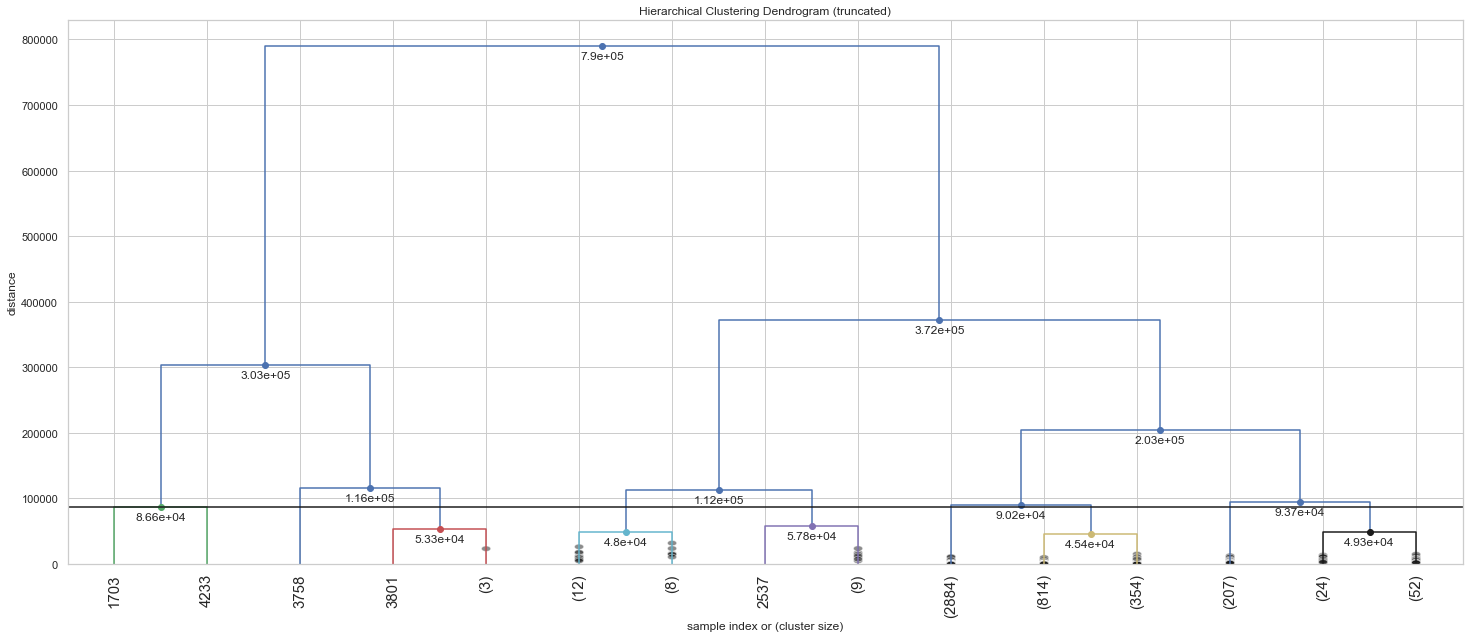

In [513]:
#Perform hiearchical cluster analysis on Customers
from scipy.cluster.hierarchy import ward, dendrogram, linkage

linkage_matrix = linkage(Customerdf, 'ward') #define the linkage_matrix using ward clustering pre-computed distances

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=15,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=15.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    annotate_above=10,
    max_d=86605,
)
plt.show()

In [514]:
#Create final array of cluster numbers from hierarchy
from scipy.cluster.hierarchy import fcluster

k=9
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

In [515]:
#Apply hierarchical clustering results to Customerdf
Customerdf['CustomerSegment'] = Series(clusters, index=Customerdf.index)
Customerdf['Country'] = result.groupby(['CustomerID']).Country.unique()
Customerdf.head()

,AverageTransactionRevenue,TotalTransactions,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,10.0,11.0,12.0,13.0,14.0,15.0,16.0,Revenue,CustomerSegment,Country
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.00,0.00,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,[United Kingdom]
12347.00,23.56,189,208.50,115.80,0.00,27.60,46.80,21.78,459.70,101.70,...,0.00,0.00,301.05,0.00,3113.49,55.80,0.00,4452.22,8,[Iceland]
12348.00,56.39,33,191.00,0.00,0.00,0.00,127.20,0.00,0.00,0.00,...,0.00,0.00,230.40,0.00,1312.24,0.00,0.00,1860.84,7,[Finland]
12349.00,24.03,85,185.80,34.80,0.00,27.04,0.00,85.05,0.00,35.40,...,0.00,0.00,367.71,0.00,1236.67,19.80,50.50,2042.77,7,[Italy]
12350.00,19.67,17,0.00,0.00,0.00,67.80,0.00,0.00,0.00,15.00,...,0.00,25.20,79.80,0.00,146.60,0.00,0.00,334.40,6,[Norway]


In [517]:
#Average number of transactions per segment
Customerdf.groupby(['CustomerSegment'])['TotalTransactions'].sum().reset_index()

,CustomerSegment,TotalTransactions
0,1,2828
1,2,10275
2,3,386
3,4,19621
4,5,14439
5,6,116668
6,7,182460
7,8,72810
8,9,32682


In [518]:
#Average transaction revenue per customer segment
Customerdf.groupby(['CustomerSegment'])['AverageTransactionRevenue'].mean().reset_index()

,CustomerSegment,AverageTransactionRevenue
0,1,349.00
1,2,88.28
2,3,540.08
3,4,439.21
4,5,165.96
5,6,19.58
6,7,40.05
7,8,47.26
8,9,79.91


In [519]:
#Average customer revenue per customer segment
Customerdf.groupby(['CustomerSegment'])['Revenue'].mean().reset_index()

,CustomerSegment,Revenue
0,1,300494.87
1,2,133564.57
2,3,208469.05
3,4,35407.53
4,5,62239.88
5,6,486.22
6,7,2445.43
7,8,6654.91
8,9,14600.55


In [520]:
#Total revenue per customer segment
Customerdf.groupby(['CustomerSegment'])['Revenue'].sum().reset_index()

,CustomerSegment,Revenue
0,1,600989.73
1,2,534258.28
2,3,208469.05
3,4,708150.63
4,5,622398.76
5,6,1402254.98
6,7,2856263.38
7,8,1377566.17
8,9,1109642.12


In [521]:
#Total customers per segment
Customerdf.groupby(['CustomerSegment'])['Revenue'].count().reset_index()

,CustomerSegment,Revenue
0,1,2
1,2,4
2,3,1
3,4,20
4,5,10
5,6,2884
6,7,1168
7,8,207
8,9,76


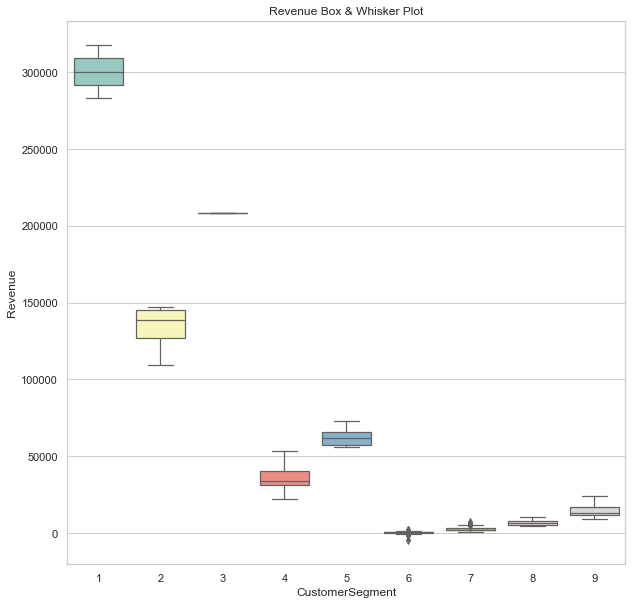

In [524]:
#Create box and whisker plot per customer segment
plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
plot1 = sns.boxplot(x='CustomerSegment', y='Revenue', data=Customerdf, palette = "Set3", 
                    linewidth=1.25).set_title('Revenue Box & Whisker Plot')

In [ ]:
#####################################
###### Classification Modeling ######
#####################################

In [56]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

/Users/coreylucero/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0.5,1,'Count of Customer Segments')

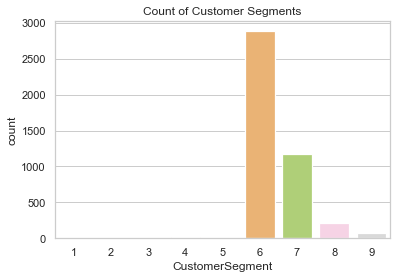

In [390]:
#Counts of each customer segment - Clearly imbalanced
sns.countplot(x="CustomerSegment",data=Customerdf, palette = "Set3", 
                    linewidth=1.25).set_title("Count of Customer Segments")

In [245]:
#Add customer country to Customerdf
Customerdf1['Country'] = Customerdf['Country'].str.get(0)
Customerdf1.head()

,Average Transaction Revenue,Total Transactions,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,10.0,11.0,12.0,13.0,14.0,15.0,16.0,Revenue,CustomerSegment,Country
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.000000,2,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,6,United Kingdom
12347.0,23.556720,189,208.5,115.8,0.0,27.60,46.8,21.78,459.7,101.7,...,0.0,0.0,301.05,0.0,3113.49,55.8,0.0,4452.22,8,Iceland
12348.0,56.389091,33,191.0,0.0,0.0,0.00,127.2,0.00,0.0,0.0,...,0.0,0.0,230.40,0.0,1312.24,0.0,0.0,1860.84,7,Finland
12349.0,24.032588,85,185.8,34.8,0.0,27.04,0.0,85.05,0.0,35.4,...,0.0,0.0,367.71,0.0,1236.67,19.8,50.5,2042.77,7,Italy
12350.0,19.670588,17,0.0,0.0,0.0,67.80,0.0,0.00,0.0,15.0,...,0.0,25.2,79.80,0.0,146.60,0.0,0.0,334.40,6,Norway


In [246]:
#Drop average and count transactions and convert country to dummy variables
Classifydf1 = Customerdf1.drop(['Average Transaction Revenue','Total Transactions'], axis=1)

Classifydf1['Country'].astype('category')

Classifydf1 = pd.get_dummies(Classifydf1, columns=["Country"])

Classifydf1.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
12347.0,208.5,115.8,0.0,27.60,46.8,21.78,459.7,101.7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12348.0,191.0,0.0,0.0,0.00,127.2,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12349.0,185.8,34.8,0.0,27.04,0.0,85.05,0.0,35.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0.0,0.0,0.0,67.80,0.0,0.00,0.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
#Separater customer segment from customer features
features = Classifydf1.drop(['CustomerSegment'], axis=1)
classifier = Classifydf1['CustomerSegment']

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
12347.0,208.5,115.8,0.0,27.60,46.8,21.78,459.7,101.7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12348.0,191.0,0.0,0.0,0.00,127.2,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12349.0,185.8,34.8,0.0,27.04,0.0,85.05,0.0,35.4,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12350.0,0.0,0.0,0.0,67.80,0.0,0.00,0.0,15.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
#Split into test/train 
from sklearn import cross_validation
X_train,X_test,y_train,y_test = cross_validation.train_test_split(features, classifier,test_size=0.2)

In [ ]:
####### SVC MODEL - No imbalance mitigation ########

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [267]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [268]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [269]:
#Commented out, DON'T RERUN - Takes a long time
#grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -  35.9s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.9s remaining:    0.0s


[CV] ............................ C=1, gamma=1, kernel=linear - 1.1min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -  25.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   1.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   1.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -  36.6s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear - 1.2min
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ........................... C=100, gamma=0.1, kernel=rbf -   1.7s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear - 1.2min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear - 3.2min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear - 2.1min
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -   1.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -   2.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -   2.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 81.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [270]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [271]:

predic = grid.predict(X_test)

In [272]:
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         1
          4       1.00      0.75      0.86         4
          5       0.00      0.00      0.00         0
          6       0.99      0.98      0.98       580
          7       0.93      0.95      0.94       237
          8       0.83      0.92      0.88        38
          9       1.00      0.86      0.92        14

avg / total       0.97      0.96      0.96       875

[[  1   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   0   3   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0 566  14   0   0]
 [  0   0   0   0   7 225   5   0]
 [  0   0   0   0   0   3  35   0]
 [  0   0   0   0   0   0   2  12]]


In [ ]:
####### Logistic Regression - No imbalance mitigation ########

In [303]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2']}

In [304]:
#grid2 = GridSearchCV(LogisticRegression(),param_grid,refit = True, verbose=2)
#grid2.fit(X_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .................................... C=0.001, penalty=l1 -   1.1s
[CV] C=0.001, penalty=l1 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] .................................... C=0.001, penalty=l1 -   1.4s
[CV] C=0.001, penalty=l1 .............................................
[CV] .................................... C=0.001, penalty=l1 -   1.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .................................... C=0.001, penalty=l2 -   0.6s
[CV] C=0.001, penalty=l2 .............................................
[CV] .................................... C=0.001, penalty=l2 -   0.6s
[CV] C=0.001, penalty=l2 .............................................
[CV] .................................... C=0.001, penalty=l2 -   0.7s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   1.7s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   5.4s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  2.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [311]:
grid2.best_params_

{'C': 1, 'penalty': 'l1'}

In [312]:
predic2 = grid2.predict(X_test)
print(classification_report(y_test,predic2))
print(confusion_matrix(y_test, predic2))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         4
          6       0.98      0.99      0.99       580
          7       0.81      0.95      0.87       237
          8       0.20      0.03      0.05        38
          9       0.00      0.00      0.00        14

avg / total       0.88      0.92      0.89       875

[[  0   1   0   0   0   0   0]
 [  0   0   1   0   0   0   0]
 [  0   0   0   0   1   2   1]
 [  0   0   0 576   4   0   0]
 [  0   0   0  12 225   0   0]
 [  0   0   0   0  37   1   0]
 [  0   0   1   0  11   2   0]]


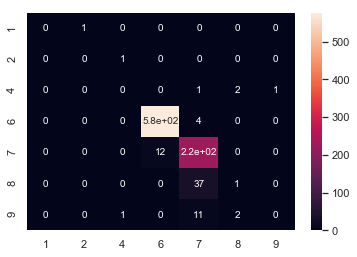

In [314]:
cm = pd.DataFrame(confusion_matrix(y_test, predic2), columns=[1,2,4,6,7,8,9], index=[1,2,4,6,7,8,9])
sns.heatmap(cm, annot=True)

In [ ]:
####### Random Forest - No imbalance mitigation ########

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

In [299]:
param_grid = {'n_estimators':[10,100,1000,10000],'oob_score':[True], 'random_state':[12345]}

In [300]:
#grid3 = GridSearchCV(RandomForestClassifier(),param_grid,refit = True, verbose=2)
#grid3.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=10, oob_score=True, random_state=12345 .............
[CV] .... n_estimators=10, oob_score=True, random_state=12345 -   0.3s
[CV] n_estimators=10, oob_score=True, random_state=12345 .............
[CV] .... n_estimators=10, oob_score=True, random_state=12345 -   0.0s
[CV] n_estimators=10, oob_score=True, random_state=12345 .............
[CV] .... n_estimators=10, oob_score=True, random_state=12345 -   0.0s
[CV] n_estimators=100, oob_score=True, random_state=12345 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ... n_estimators=100, oob_score=True, random_state=12345 -   0.4s
[CV] n_estimators=100, oob_score=True, random_state=12345 ............
[CV] ... n_estimators=100, oob_score=True, random_state=12345 -   0.4s
[CV] n_estimators=100, oob_score=True, random_state=12345 ............
[CV] ... n_estimators=100, oob_score=True, random_state=12345 -   0.4s
[CV] n_estimators=1000, oob_score=True, random_state=12345 ...........
[CV] .. n_estimators=1000, oob_score=True, random_state=12345 -   3.9s
[CV] n_estimators=1000, oob_score=True, random_state=12345 ...........
[CV] .. n_estimators=1000, oob_score=True, random_state=12345 -   3.4s
[CV] n_estimators=1000, oob_score=True, random_state=12345 ...........
[CV] .. n_estimators=1000, oob_score=True, random_state=12345 -   3.4s
[CV] n_estimators=10000, oob_score=True, random_state=12345 ..........
[CV] . n_estimators=10000, oob_score=True, random_state=12345 -  34.2s
[CV] n_estimators=10000, oob_score=True, random_state=12345 ..........
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000, 10000], 'oob_score': [True], 'random_state': [12345]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [301]:
grid3.best_params_

{'n_estimators': 1000, 'oob_score': True, 'random_state': 12345}

In [310]:
predic3 = grid3.predict(X_test)
print(classification_report(y_test,predic3))
print(confusion_matrix(y_test, predic3))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         1
          4       1.00      0.25      0.40         4
          5       0.00      0.00      0.00         0
          6       0.99      0.99      0.99       580
          7       0.94      0.99      0.96       237
          8       0.89      0.84      0.86        38
          9       0.71      0.71      0.71        14

avg / total       0.97      0.97      0.97       875

[[  0   0   0   0   0   0   0   1]
 [  0   0   0   1   0   0   0   0]
 [  0   0   1   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0 572   8   0   0]
 [  0   0   0   0   3 234   0   0]
 [  0   0   0   0   0   6  32   0]
 [  0   0   0   0   0   0   4  10]]


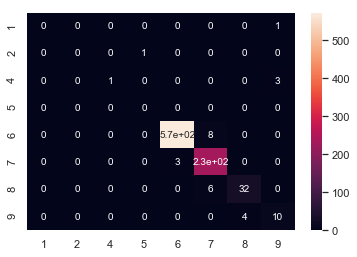

In [309]:
cm = pd.DataFrame(confusion_matrix(y_test, predic3), columns=[1,2,4,5,6,7,8,9], index=[1,2,4,5,6,7,8,9])
sns.heatmap(cm, annot=True)

In [ ]:
####### SMOTE Train/Test Split ########

In [364]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

training_features, test_features, \
training_target, test_target, = train_test_split(features,
                                               classifier,
                                               test_size = .2,
                                               random_state=12)

In [374]:
sm = SMOTE(random_state=12, ratio = 1.0, k_neighbors=1)
x_train_res, y_train_res = sm.fit_sample(training_features, training_target)

In [388]:
from collections import Counter

Counter(y_train_res).keys() # equals to list(set(words))
Counter(y_train_res).values() # counts the elements' frequency

dict_values([2317, 2317, 2317, 2317, 2317, 2317, 2317, 2317])

In [ ]:
####### SMOTE - Random Forest Classification ########

In [375]:
param_grid = {'n_estimators':[10,100,1000,10000],'oob_score':[True], 'random_state':[12345]}

In [376]:
#grid4 = GridSearchCV(RandomForestClassifier(),param_grid,refit = True, verbose=2)
#grid4.fit(x_train_res,y_train_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=10, oob_score=True, random_state=12345 .............
[CV] .... n_estimators=10, oob_score=True, random_state=12345 -   0.2s
[CV] n_estimators=10, oob_score=True, random_state=12345 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... n_estimators=10, oob_score=True, random_state=12345 -   0.2s
[CV] n_estimators=10, oob_score=True, random_state=12345 .............
[CV] .... n_estimators=10, oob_score=True, random_state=12345 -   0.2s
[CV] n_estimators=100, oob_score=True, random_state=12345 ............
[CV] ... n_estimators=100, oob_score=True, random_state=12345 -   1.7s
[CV] n_estimators=100, oob_score=True, random_state=12345 ............
[CV] ... n_estimators=100, oob_score=True, random_state=12345 -   1.7s
[CV] n_estimators=100, oob_score=True, random_state=12345 ............
[CV] ... n_estimators=100, oob_score=True, random_state=12345 -   1.7s
[CV] n_estimators=1000, oob_score=True, random_state=12345 ...........
[CV] .. n_estimators=1000, oob_score=True, random_state=12345 -  16.5s
[CV] n_estimators=1000, oob_score=True, random_state=12345 ...........
[CV] .. n_estimators=1000, oob_score=True, random_state=12345 -  16.5s
[CV] n_estimators=1000, oob_score=True, random_state=12345 ...........
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  9.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000, 10000], 'oob_score': [True], 'random_state': [12345]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [377]:
grid4.best_params_

{'n_estimators': 1000, 'oob_score': True, 'random_state': 12345}

In [378]:
predic4 = grid4.predict(test_features)
print(classification_report(test_target,predic4))
print(confusion_matrix(test_target, predic4))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         1
          4       0.67      1.00      0.80         2
          5       1.00      0.75      0.86         4
          6       0.99      0.99      0.99       567
          7       0.95      0.97      0.96       244
          8       0.93      0.88      0.90        42
          9       1.00      1.00      1.00        15

avg / total       0.97      0.97      0.97       875

[[  0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0]
 [  0   0   1   3   0   0   0   0]
 [  0   0   0   0 559   8   0   0]
 [  0   0   0   0   5 236   3   0]
 [  0   0   0   0   0   5  37   0]
 [  0   0   0   0   0   0   0  15]]


In [ ]:
####### SMOTE - Logistic Regression ########

In [379]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2']}
#grid5 = GridSearchCV(LogisticRegression(),param_grid,refit = True, verbose=2)
#grid5.fit(x_train_res,y_train_res)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .................................... C=0.001, penalty=l1 -  13.8s
[CV] C=0.001, penalty=l1 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s remaining:    0.0s


[CV] .................................... C=0.001, penalty=l1 -  17.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .................................... C=0.001, penalty=l1 -  18.4s
[CV] C=0.001, penalty=l2 .............................................
[CV] .................................... C=0.001, penalty=l2 -   3.7s
[CV] C=0.001, penalty=l2 .............................................
[CV] .................................... C=0.001, penalty=l2 -   3.9s
[CV] C=0.001, penalty=l2 .............................................
[CV] .................................... C=0.001, penalty=l2 -   3.2s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   4.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..................................... C=0.01, penalty=l1 -   6.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  2.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [380]:
grid5.best_params_

{'C': 1000, 'penalty': 'l1'}

In [381]:
predic5 = grid5.predict(test_features)
print(classification_report(test_target,predic5))
print(confusion_matrix(test_target, predic5))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         1
          4       0.25      0.50      0.33         2
          5       1.00      0.50      0.67         4
          6       0.98      0.99      0.98       567
          7       0.94      0.80      0.87       244
          8       0.39      0.62      0.48        42
          9       0.14      0.20      0.17        15

avg / total       0.92      0.90      0.91       875

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1]
 [  1   0   1   0   0   0   0   0]
 [  0   0   2   2   0   0   0   0]
 [  0   0   0   0 559   7   1   0]
 [  1   0   0   0  12 196  30   5]
 [  0   0   0   0   0   4  26  12]
 [  0   0   1   0   1   1   9   3]]


In [ ]:
####### SMOTE - SVC ########

In [382]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
#grid6 = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
#grid6.fit(x_train_res,y_train_res)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -  51.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.2s remaining:    0.0s


[CV] ............................ C=1, gamma=1, kernel=linear - 1.4min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear - 1.1min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -  19.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -  19.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -  19.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -  50.8s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear - 1.4min
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ........................... C=100, gamma=0.1, kernel=rbf -  20.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear - 2.8min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear - 3.2min
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...................... C=100, gamma=0.001, kernel=linear - 2.2min
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -  22.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -  22.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......................... C=100, gamma=0.001, kernel=rbf -  23.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 166.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [383]:
grid6.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [384]:
predic6 = grid6.predict(test_features)
print(classification_report(test_target,predic6))
print(confusion_matrix(test_target, predic6))

             precision    recall  f1-score   support

          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         1
          4       0.67      1.00      0.80         2
          5       1.00      0.75      0.86         4
          6       0.99      0.98      0.99       567
          7       0.95      0.96      0.96       244
          8       0.87      0.93      0.90        42
          9       1.00      0.93      0.97        15

avg / total       0.97      0.97      0.97       875

[[  0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0]
 [  0   0   1   3   0   0   0   0]
 [  0   0   0   0 558   9   0   0]
 [  0   0   0   0   5 234   5   0]
 [  0   0   0   0   0   3  39   0]
 [  0   0   0   0   0   0   1  14]]
